In [35]:
# Import
import re
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import quad


In [36]:
# Parameters
n = 50
C = 10
meanT = 9.3
meanM = 30
oneItemST = 3

# The number of items in a customer's cart is an EXPONENTIAL random variable
def expCDF(x_, lambda_):
    return 1 - math.exp(- lambda_ * x_)

def expPDF(x_, lambda_):
    return lambda_ * math.exp(- lambda_ * x_)

# Factors
p = 0.1
K = 14

# CSV name
# jtsq
# csv_name = "CalibrationTest"
# equallylikely
# csv_name = "TestFME"
csv_name = "NONSO"

In [37]:
CSV = pd.read_csv(f"{csv_name}.csv").fillna(0)
CSV = CSV[CSV["type"] == "scalar"]

# NQ: Mean Number of Customers in Queue [Queues]
Exp_NQ = CSV[CSV["module"].str.contains("SuperMarket.checkout.queues")]
Exp_NQ = Exp_NQ[Exp_NQ["name"] == "queueLength:timeavg"]

# RHO: Mean Utilization [Queues]
Exp_RHO = CSV[CSV["module"].str.contains("SuperMarket.checkout.queues")]
Exp_RHO = Exp_RHO[Exp_RHO["name"] == "busy:timeavg"]

# S: Mean Service Time (t_S) [LocalSink] 
Exp_S = CSV[CSV["module"].str.contains("SuperMarket.checkout.localSink")]
Exp_S = Exp_S[Exp_S["name"] == "totalServiceTime:mean"]

# W: Mean Waiting Time [Queues]
Exp_W = CSV[CSV["module"].str.contains("SuperMarket.checkout.queues")]
Exp_W = Exp_W[Exp_W["name"] == "queueingTime:mean"]

# TW: Total Mean Waiting Time [GlobalSink]
Exp_TW = CSV[CSV["module"].str.contains("SuperMarket.globalSink")]
Exp_TW = Exp_TW[Exp_TW["name"] == "totalQueueingTime:mean"]


# Dictionary for containing all the DataFrames
CSV_Dict = {
    "NQ": Exp_NQ,
    "RHO": Exp_RHO,
    "S": Exp_S,
    "W": Exp_W
}


PI = {}

Q = []
for i in range(C):
    Q.append(f"Q{i}")

for key in CSV_Dict:
    PI[key] = pd.DataFrame(columns=Q)
    for i in range(C):
        temp = []
        temp = [CSV_Dict[key]["value"].values[j*C + i] for j in range(n)]
        string = f"Q{i}"
        temp = list(map(float, temp))
        PI[key][string] = temp
   

KeyError: 'value'

In [ ]:
Exp_TW = Exp_TW["value"].values
Exp_TW

array(['1177.9630938416', '1087.3057424676', '789.0537185487',
       '798.71579289053', '1043.1749567742', '789.94814080338',
       '1007.9199162364', '771.14574828697', '937.96260178671',
       '1055.5869376596', '836.12556010622', '601.03645131827',
       '1020.6193622787', '1284.9996456835', '1144.3141282437',
       '1567.8882428299', '822.5542998376', '1213.006762588',
       '706.28630085231', '959.72781137395', '570.00957922267',
       '935.43411467773', '878.54003866857', '1474.5317937456',
       '986.68657103395', '812.48674441772', '1091.4046711909',
       '1354.8305102224', '1086.8792339907', '1051.4099510029',
       '907.98386372344', '1082.3603464464', '1008.0136344415',
       '780.05818420888', '858.88996920804', '1302.6466010347',
       '1176.4770480426', '730.10292431998', '923.49914980942',
       '823.3186594635', '803.23758004561', '981.92342634245',
       '1065.3551143302', '997.65810348943', '730.37143910817',
       '694.94227703156', '836.0185718911', 

In [ ]:
Exp_TW.tolist()
temp = list(map(float, Exp_TW))

In [ ]:
prova = pd.DataFrame(temp)

In [ ]:
prova.mean()

0    974.087143
dtype: float64

In [ ]:
PI["RHO"]

,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
0,0.837343,0.931457,0.000000,0.941682,0.922238,0.945032,0.906135,0.927443,0.788057,0.000000
1,0.887182,0.907353,0.928508,0.945014,0.000000,0.984563,0.944669,0.000000,0.964893,0.000000
2,0.857253,0.989208,0.924945,0.867206,0.878768,0.975218,0.000000,0.899626,0.941833,0.857340
3,0.885392,0.942393,0.982131,0.972694,0.000000,0.943909,0.948847,0.918570,0.997731,0.946155
4,0.859629,0.821179,0.987356,0.960523,0.761941,0.000000,0.969250,0.955531,0.978064,0.000000
5,0.855976,0.936213,0.970783,0.923913,0.880109,0.000000,0.948872,0.969954,0.955577,0.980159
6,0.869525,0.978023,0.808629,0.000000,0.000000,0.962822,0.957068,0.978117,0.000000,0.967519
7,0.868326,0.977247,0.989711,0.845121,0.945586,0.835943,0.983143,0.905358,0.917346,0.000000
8,0.882810,0.963816,0.920880,0.872289,0.975791,0.000000,0.935907,0.000000,0.982032,0.965139
9,0.861143,0.878179,0.889795,0.000000,0.998738,0.000000,0.000000,0.918484,0.940114,0.971239


In [ ]:
PI["RHO"]["Q0"] = PI["RHO"]["Q0"].apply(lambda x: x + 1 if x == 0 else x)
PI["RHO"]["Q1"] = PI["RHO"]["Q1"].apply(lambda x: x + 1 if x == 0 else x)
PI["RHO"]["Q2"] = PI["RHO"]["Q2"].apply(lambda x: x + 1 if x == 0 else x)
PI["RHO"]["Q3"] = PI["RHO"]["Q3"].apply(lambda x: x + 1 if x == 0 else x)
PI["RHO"]["Q4"] = PI["RHO"]["Q4"].apply(lambda x: x + 1 if x == 0 else x)
PI["RHO"]["Q5"] = PI["RHO"]["Q5"].apply(lambda x: x + 1 if x == 0 else x)
PI["RHO"]["Q6"] = PI["RHO"]["Q6"].apply(lambda x: x + 1 if x == 0 else x)
PI["RHO"]["Q7"] = PI["RHO"]["Q7"].apply(lambda x: x + 1 if x == 0 else x)
PI["RHO"]["Q8"] = PI["RHO"]["Q8"].apply(lambda x: x + 1 if x == 0 else x)
PI["RHO"]["Q9"] = PI["RHO"]["Q9"].apply(lambda x: x + 1 if x == 0 else x)


In [ ]:
PI["RHO"]

,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
0,0.837343,0.931457,1.000000,0.941682,0.922238,0.945032,0.906135,0.927443,0.788057,1.000000
1,0.887182,0.907353,0.928508,0.945014,1.000000,0.984563,0.944669,1.000000,0.964893,1.000000
2,0.857253,0.989208,0.924945,0.867206,0.878768,0.975218,1.000000,0.899626,0.941833,0.857340
3,0.885392,0.942393,0.982131,0.972694,1.000000,0.943909,0.948847,0.918570,0.997731,0.946155
4,0.859629,0.821179,0.987356,0.960523,0.761941,1.000000,0.969250,0.955531,0.978064,1.000000
5,0.855976,0.936213,0.970783,0.923913,0.880109,1.000000,0.948872,0.969954,0.955577,0.980159
6,0.869525,0.978023,0.808629,1.000000,1.000000,0.962822,0.957068,0.978117,1.000000,0.967519
7,0.868326,0.977247,0.989711,0.845121,0.945586,0.835943,0.983143,0.905358,0.917346,1.000000
8,0.882810,0.963816,0.920880,0.872289,0.975791,1.000000,0.935907,1.000000,0.982032,0.965139
9,0.861143,0.878179,0.889795,1.000000,0.998738,1.000000,1.000000,0.918484,0.940114,0.971239


In [ ]:
PI_TABLE = {}

for key in PI:
    PI_TABLE[key] = pd.DataFrame(columns=["Theoretical", "Mean", "CI - LB", "CI - UB"])
    
    # Mean Value of the "n" repetitions for each Queue
    PI_TABLE[key]["Mean"] = PI[key].mean()

    # CI 95%
    # Lower Bound
    PI_TABLE[key]["CI - LB"] = PI[key].mean() - (1.96 * (PI[key].std() / math.sqrt(n)))
    # Upper Bound
    PI_TABLE[key]["CI - UB"] = PI[key].mean() + (1.96 * (PI[key].std() / math.sqrt(n)))



In [ ]:
# for key in PI_TABLE:
#     print(f"[{key}]:")
#     print(PI_TABLE[key])
#     print("\n")

In [ ]:
# Theoretical Formulas and Computations

# g(M) = round(M) + 1 = floor(M+1.5)
def g(x):
    return math.floor(x+1.5)  

def integrand(x):
    return (g(x) * expPDF(x, (1/(meanM-1))))

def integrand_2(x):
    return ((g(x)**2) * expPDF(x, (1/(meanM-1))))


# Number of Quick Tills
quickTills = int(p*C)

# Interarrival Rate
lambdaT = 1/meanT

temp = {}

if (quickTills == 0) or quickTills == C:
    # There are no Quick Tills or all the Tills are Quick Tills
    # So the probability alphaK of being routed to a Quick Till is either 0 or 1

    pi_ = 1/C
    lambdaT_ = lambdaT*pi_

    meanST_ = meanM * oneItemST
    lambdaST_ = 1/meanST_
    
    # Utilization
    rho_ = lambdaT_/lambdaST_

    # Mean Number of Customers in M/M/1
    N_ = rho_/(1-rho_)

    # Mean Number of Customers in a Queue
    NQ_ = N_ - rho_

    # Mean Response Time
    R_ = N_/lambdaT_

    # Mean Waiting Time
    W_ = R_ - meanST_


    temp["NQ"] = NQ_
    temp["RHO"] = rho_
    temp["S"] = meanST_
    temp["W"] = W_


    for key in PI_TABLE:
        PI_TABLE[key]["Theoretical"] = [temp[key]] * C

else:
    # There are Quick Tills AND Normal Tills
    # So the probability alphaK of being routed to a Quick Till is 0 < alphaK < 1
    
    # CDF of an EXPONENTIAL distribution
    alphaK = expCDF((K-0.5), (1/(meanM-1)))

    # --- Quick Tills ---

    # Probability of being routed to a specific Quick Till (i)
    # Inside a subsystem (Quick Tills or Normal Tills) the
    # probability of being routed to a specific Till is the
    # same (i.e. "equallylikely")
    pi_i = alphaK/quickTills
    
    # Interarrival Rate for an individual Quick Till
    lambdaT_i = lambdaT*pi_i
    
    # Mean Number of items in a customer's cart for an individual Quick Till
    meanM_i = (quad(integrand, 0, (K-0.5), limit=200)[0])/alphaK

    # Mean Service Time for an individual Quick Till
    meanST_i = meanM_i * oneItemST


    # Variance = E[X^2] - E[X]^2
    # Variance of M_i
    VarM_i = ((quad(integrand_2, 0, (K-0.5), limit=200)[0])/alphaK) - meanM_i**2

    # Variance of ST_i
    VarST_i = VarM_i * oneItemST**2
    
    
    # Performance Indeces for an individual Quick Till

    rho_i = lambdaT_i * meanST_i
    N_i = rho_i + ((rho_i**2 + lambdaT_i**2 * VarST_i)/(2*(1-rho_i)))
    NQ_i = N_i - rho_i
    R_i = N_i/lambdaT_i
    W_i = R_i - meanST_i
    
    temp["NQ"] = {}
    temp["NQ"]["i"] = NQ_i

    temp["RHO"] = {}
    temp["RHO"]["i"] = rho_i

    temp["S"] = {}
    temp["S"]["i"] = meanST_i

    temp["W"] = {}
    temp["W"]["i"] = W_i


    # --- Normal Tills ---

    # Probability of being routed to a specific Normal Till (j)
    # Inside a subsystem (Quick Tills or Normal Tills) the
    # probability of being routed to a specific Till is the
    # same (i.e. "equallylikely")
    pi_j = (1-alphaK)/(C-quickTills)

    # Interarrival Rate for an individual Normal Till
    lambdaT_j = lambdaT*pi_j

    # Mean Number of items in a customer's cart for an individual Normal Till
    meanM_j = (quad(integrand, (K-0.5), np.inf, limit=200)[0])/(1-alphaK)

    # Mean Service Time for an individual Normal Till
    meanST_j = meanM_j * oneItemST

    # Variance = E[X^2] - E[X]^2
    # Variance of M_j
    VarM_j = ((quad(integrand_2, (K-0.5), np.inf, limit=200)[0])/(1-alphaK)) - meanM_j**2

    # Variance of ST_j
    VarST_j = VarM_j * oneItemST**2
    
    # Performance Indeces for an individual Normal Till

    rho_j = lambdaT_j * meanST_j
    N_j = rho_j + ((rho_j**2 + lambdaT_j**2 * VarST_j)/(2*(1-rho_j)))
    NQ_j = N_j - rho_j
    R_j = N_j/lambdaT_j
    W_j = R_j - meanST_j

    temp["NQ"]["j"] = NQ_j
    temp["RHO"]["j"] = rho_j
    temp["S"]["j"] = meanST_j
    temp["W"]["j"] = W_j
    
    # Adding the Theoretical Values to the PI_TABLE
    for key in PI_TABLE:
        PI_TABLE[key]["Theoretical"] = [temp[key]["i"]] * quickTills + [temp[key]["j"]] * (C-quickTills)
    


C:\Users\giova\AppData\Local\Temp\ipykernel_21984\2486292312.py:76: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  meanM_i = (quad(integrand, 0, (K-0.5), limit=200)[0])/alphaK
C:\Users\giova\AppData\Local\Temp\ipykernel_21984\2486292312.py:84: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up 

In [ ]:
for key in PI_TABLE:
    PI_TABLE[key]["OK"] = [""] * C
    for i in range(C):
        if PI_TABLE[key]["Theoretical"].iloc[i] <= PI_TABLE[key]["CI - UB"].iloc[i] and PI_TABLE[key]["Theoretical"].iloc[i] >= PI_TABLE[key]["CI - LB"].iloc[i]:
            PI_TABLE[key].loc[f"Q{i}", "OK"] = "V"

In [ ]:
csv_name

'TestONE'

In [ ]:
lambdaT

0.1075268817204301

In [ ]:
pi_j

0.06975669908135125

In [ ]:
PI["W"]

,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
0,70.782435,1028.478953,6624.222197,2866.899935,1414.300070,855.076444,659.669133,905.986629,370.915819,1851.655857
1,86.110165,902.882786,742.361962,2623.610766,2075.083672,2375.473663,1206.283304,2087.259175,1077.128182,2392.151902
2,57.484306,1851.440869,647.717088,326.097636,1641.417345,1599.701958,2724.300314,1022.715743,602.773687,482.863734
3,93.986720,730.857406,944.979883,1112.735107,2001.111739,952.010466,688.200042,982.803502,2916.319636,912.799367
4,93.229726,1089.483709,1187.955553,1345.221171,2006.871267,2246.537401,1851.843033,1088.003360,1967.574979,1736.908733
5,145.951527,937.167330,1224.458652,687.889497,1056.839568,1490.174898,1399.832367,1026.433193,1428.101981,1356.346250
6,108.174166,2071.387535,850.169164,1751.615817,1191.932331,995.814232,1177.607557,1266.108267,2786.846494,1590.822169
7,82.759330,1750.670601,1254.685405,1684.115916,729.443758,360.249286,1340.814630,1156.102465,642.095422,1653.114994
8,107.916124,1678.774206,996.048859,443.213626,2057.379329,2802.790216,540.829740,1792.580740,1892.800982,710.070793
9,89.507191,404.694332,724.058182,1916.191923,1494.902650,1852.122133,5185.913942,1178.363149,972.756385,1007.639586


In [ ]:
for key in PI_TABLE:
    print(f"[{key}]:")
    print(PI_TABLE[key])
    print("\n")

[NQ]:
    Theoretical       Mean    CI - LB    CI - UB OK
Q0     3.635855   3.586393   3.324889   3.847898  V
Q1    32.743272  12.844569  10.128971  15.560167   
Q2    32.743272   9.700974   7.574799  11.827148   
Q3    32.743272  13.287723  10.417326  16.158120   
Q4    32.743272  12.028672   9.949930  14.107413   
Q5    32.743272  11.020483   9.038295  13.002671   
Q6    32.743272  10.725965   8.739757  12.712172   
Q7    32.743272  12.257074   9.994138  14.520010   
Q8    32.743272  11.055495   9.110034  13.000957   
Q9    32.743272  10.782614   8.843538  12.721689   


[RHO]:
    Theoretical      Mean   CI - LB   CI - UB OK
Q0     0.866778  0.862455  0.855115  0.869795  V
Q1     0.978866  0.952667  0.938662  0.966673   
Q2     0.978866  0.923645  0.901950  0.945340   
Q3     0.978866  0.940489  0.922698  0.958281   
Q4     0.978866  0.937946  0.918881  0.957012   
Q5     0.978866  0.941357  0.916147  0.966567   
Q6     0.978866  0.932483  0.914177  0.950789   
Q7     0.978866  0.94

In [ ]:
# 11.7 
# Mean     CI - LB     CI - UB
#  30.842112   29.469983   32.214241   
# 353.785597  289.501256  418.069938   
# 303.754612  256.663163  350.846060   
# 393.969256  320.576428  467.362084   
# 334.623320  299.521569  369.725071   
# 307.057877  276.340570  337.775184   
# 327.493622  293.945349  361.041895   
# 324.306611  286.419621  362.193602   
# 300.641766  265.240752  336.042779   
# 328.134566  288.240141  368.028992  

# 9.3
# Mean         LB           UB   
# 89.424246    83.359135    95.489358   
# 1674.715057  1327.342730  2022.087384   
# 1286.792931  1005.322694  1568.263167   
# 1721.518221  1385.063332  2057.973109   
# 1563.993257  1304.757921  1823.228592   
# 1437.331975  1189.615616  1685.048334   
# 1392.410857  1152.213066  1632.608649   
# 1589.066801  1310.294723  1867.838878   
# 1447.470791  1199.595476  1695.346107   
# 1413.360167  1172.690020  1654.030314 

In [ ]:
PI_TABLE["W"]["Mean"].mean()

1361.6084302121546

In [ ]:
# How the mean of M chages when the different transformation are applied

meanM_Test = 20


# meanM_Test -1
def integrand_Test1(x):
    return (x*expPDF(x, (1/(meanM_Test-1))))

# meanM_Test
def integrand_Test2(x):
    return (x*expPDF(x, (1/(meanM_Test))))

# mean of M'
def integrand_Test3(x):
    return (math.floor(x+0.5)*expPDF(x, (1/(meanM_Test))))

# mean of M''
def integrand_Test4(x):
    return (math.floor(x+1+0.5)*expPDF(x, (1/(meanM_Test))))

# mean of M'' with meanM_Test - 1
def integrand_Test5(x):
    return (math.floor(x+1+0.5)*expPDF(x, (1/(meanM_Test-1))))



print("meanM_Test - 1: " + str(quad(integrand_Test1, 0, np.inf, limit=200)[0]))
print("meanM_Test: " + str(quad(integrand_Test2, 0, np.inf, limit=200)[0]))
print("mean of M': " + str(quad(integrand_Test3, 0, np.inf, limit=200)[0]))
print("mean of M'': " + str(quad(integrand_Test4, 0, np.inf, limit=200)[0]))
print("mean of M'' with meanM_Test - 1: " + str(quad(integrand_Test5, 0, np.inf, limit=200)[0]))


meanM_Test - 1: 19.00000000000003
meanM_Test: 19.999999999999787
mean of M': 19.997687352603702
mean of M'': 20.99768735260366
mean of M'' with meanM_Test - 1: 19.997728271654925


C:\Users\giova\AppData\Local\Temp\ipykernel_21984\2955862547.py:30: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  print("mean of M': " + str(quad(integrand_Test3, 0, np.inf, limit=200)[0]))
C:\Users\giova\AppData\Local\Temp\ipykernel_21984\2955862547.py:31: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain fro

In [ ]:
PI["W"]["Q3"].mean(), PI["W"]["Q3"].std()

(1721.5182205714425, 1213.824150062721)

C:\Users\giova\AppData\Local\Temp\ipykernel_21984\617215983.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(PI["W"]["Q1"], hist=False, rug=True, label="Q1")


<Axes: xlabel='Q1', ylabel='Density'>

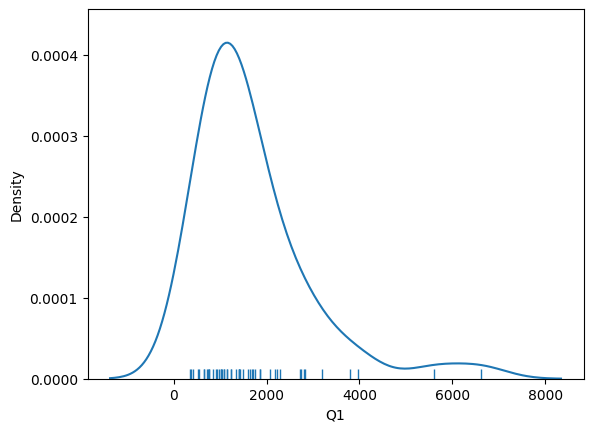

In [ ]:
# Plot the epdf of PI_df["W"]["0.1_14"]["Q1"]
sns.distplot(PI["W"]["Q1"], hist=False, rug=True, label="Q1")


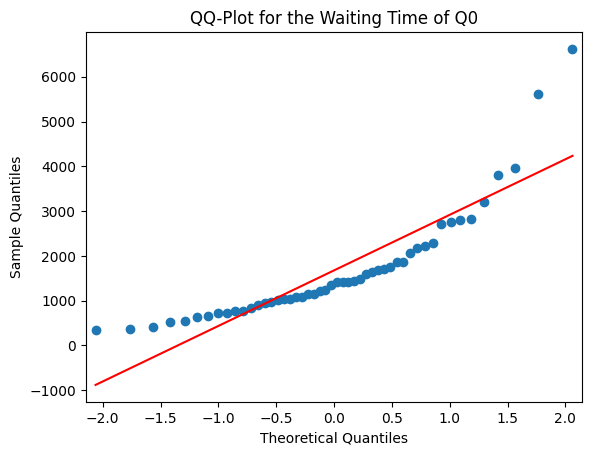

[4.25961088 4.45562746 4.05151198 4.5431535  4.53506661 4.98327456
 4.68374258 4.41593676 4.68135429 4.49431897 4.41360678 4.53993676
 4.22777429 4.18256909 4.1185493  4.34722495 4.74082833 4.54877004
 4.38848552 4.25844095 4.35008225 4.14174398 4.65626848 4.61489571
 4.13952202 4.39207592 4.34543234 4.65838176 4.75994087 4.05131826
 4.62667629 4.71645435 4.18534302 4.76141062 4.11077543 4.15613516
 4.18540652 4.46739961 4.59247893 4.67523553 4.48367956 4.34362266
 4.711638   4.3066862  4.46960632 4.98462282 4.82212734 4.35871594
 4.50979152 4.79572408]


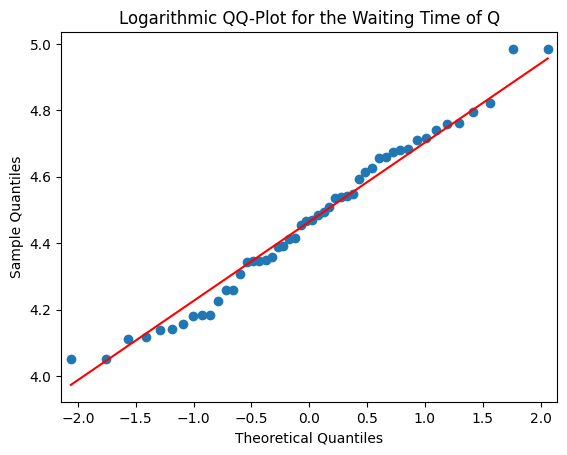

In [ ]:
from statsmodels.graphics.gofplots import qqplot
import numpy as np
# Plot QQ-Plot for the Waiting Time of Q0
import matplotlib.pyplot as plt

qqplot(PI["W"]["Q1"], line='s')
plt.title('QQ-Plot for the Waiting Time of Q0')
plt.show()

# Take the logarithm of the data
prova = PI["W"]["Q0"].values
log_data = np.log(prova.astype(np.float64))
print(log_data)

qqplot(log_data, line='s')
plt.title('Logarithmic QQ-Plot for the Waiting Time of Q')
plt.show()

